In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm

# Cargando el DataFrame
file_path = r"C:\Users\jimen\OneDrive\Escritorio\TESIS\Data\Python\modelo_trimestral_limpio.xlsx"
df = pd.read_excel(file_path, decimal=',')

# Convirtiendo año y trimestre en una fecha y estableciéndola como índice
df['fecha'] = pd.to_datetime(df['ano'].astype(str) + 'Q' + df['trimestre'].astype(str))
df.set_index('fecha', inplace=True)
print(df.head())

             ano  trimestre        montos     inp        pib       fbc  \
fecha                                                                    
2000-04-01  2000          2  7.911855e+08  191.94  100329.48  30688.07   
2000-07-01  2000          3  2.243034e+09  198.11  101038.64  29361.68   
2000-10-01  2000          4  7.573976e+08  204.14  109422.18  27006.68   
2001-01-01  2001          1  6.559477e+08  209.08  101475.53  31964.81   
2001-04-01  2001          2  1.236151e+08  215.71  104079.62  33305.56   

                roe      roa  
fecha                         
2000-04-01  0.01105 -0.01275  
2000-07-01  0.01760 -0.01170  
2000-10-01  0.02415 -0.01065  
2001-01-01  0.03190 -0.00120  
2001-04-01  0.03230 -0.00045  


C:\Users\jimen\AppData\Local\Temp\ipykernel_24516\4198386070.py:12: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['fecha'] = pd.to_datetime(df['ano'].astype(str) + 'Q' + df['trimestre'].astype(str))


In [12]:
#borrando columnas innecesarias
df = df.drop(["ano", "trimestre"], axis=1)

In [13]:
print(df.describe())
print(df.info())

             montos           inp            pib           fbc        roe  \
count  7.900000e+01  7.900000e+01      79.000000     79.000000  79.000000   
mean   3.388669e+08  5.321765e+10  117764.213299  34373.668122   0.176546   
std    4.621929e+08  2.923518e+11   32578.287086  22277.171237   0.111787   
min    5.585671e+04  1.919400e+02   38673.000000  -5805.040000  -0.072750   
25%    5.937014e+07  5.136650e+02   99328.140000  18454.530000   0.124900   
50%    1.441598e+08  1.513450e+03  123901.640000  32247.940000   0.174350   
75%    4.058267e+08  9.821950e+03  142598.945000  52932.035000   0.220125   
max    2.243034e+09  2.398775e+12  168830.580000  80176.650000   0.469300   

             roa  
count  79.000000  
mean    0.045947  
std     0.035136  
min    -0.031500  
25%     0.030900  
50%     0.045500  
75%     0.070000  
max     0.150500  
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 79 entries, 2000-04-01 to 2020-10-01
Data columns (total 6 columns):
 #   Column  

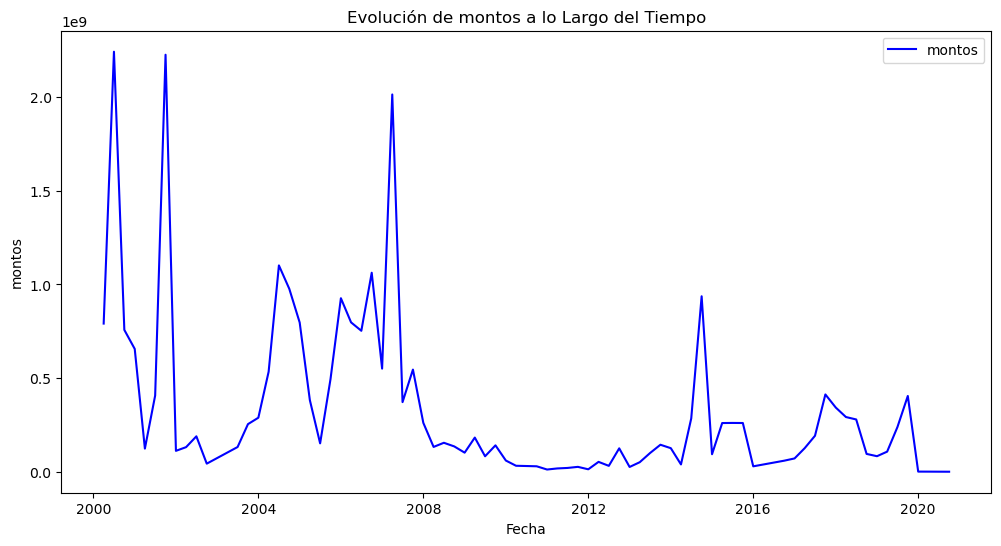

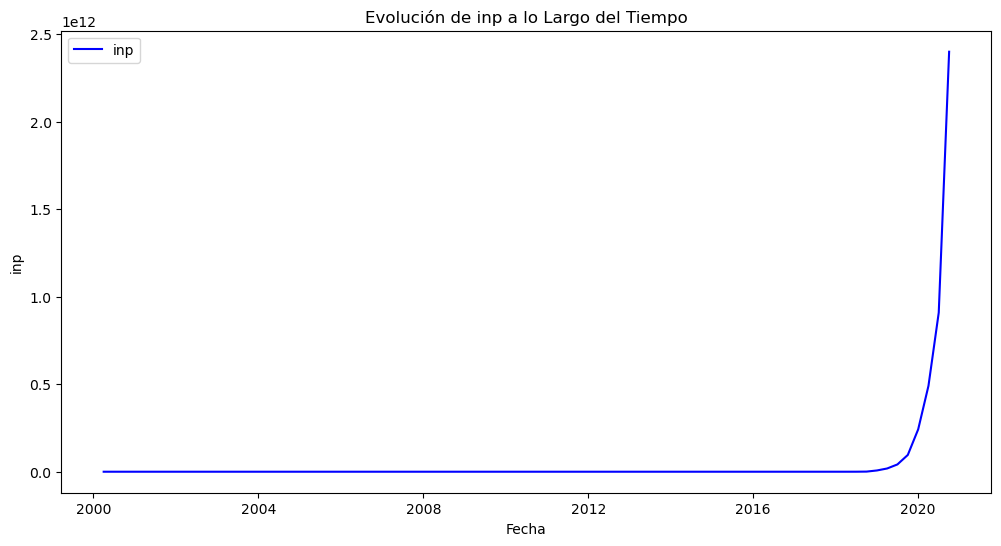

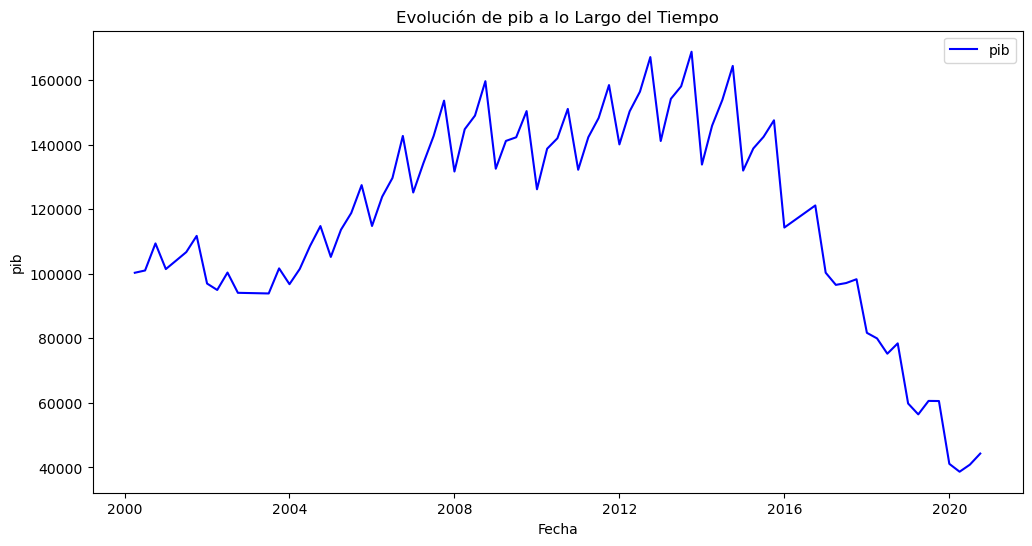

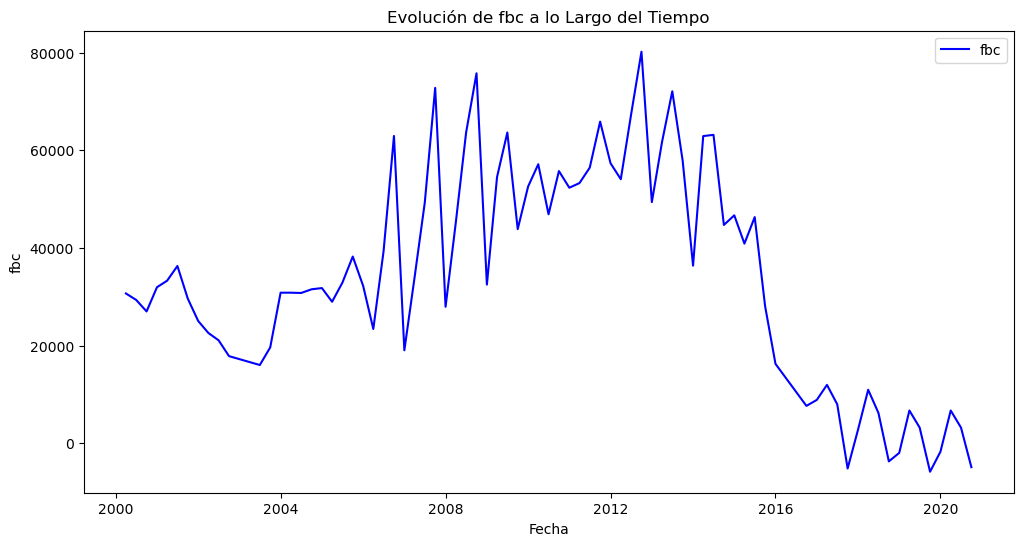

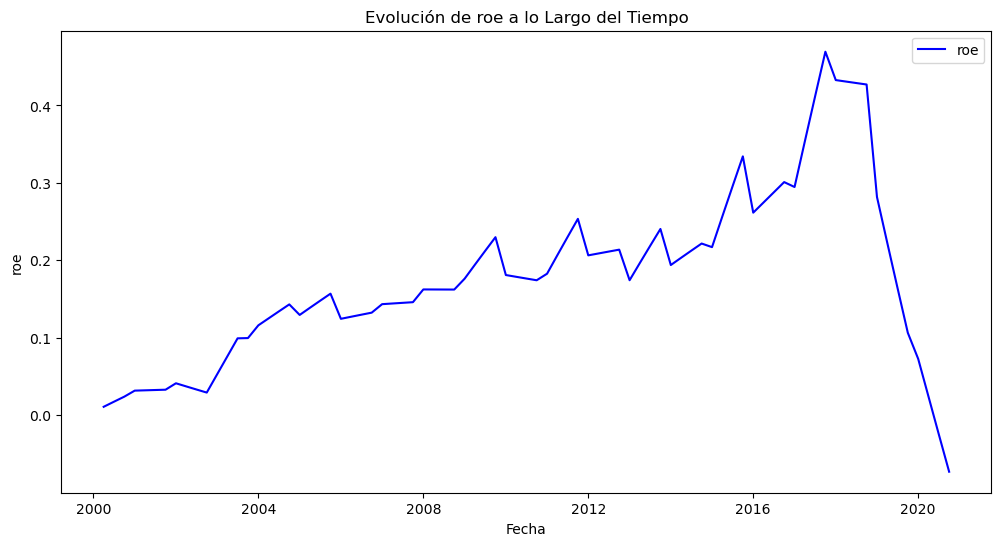

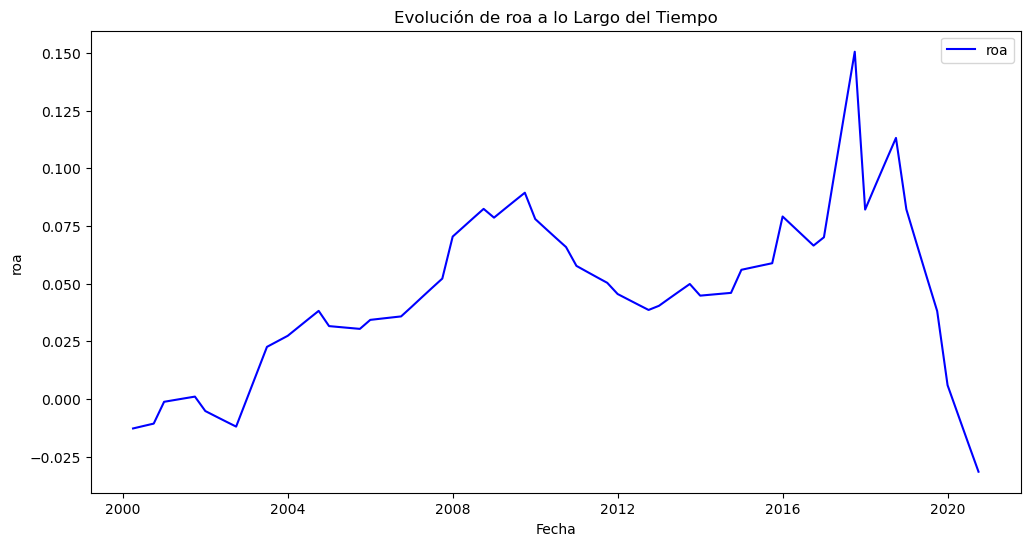

In [14]:
variables = df.columns 
for var in variables:
    plt.figure(figsize=(12, 6))
    plt.plot(df.index, df[var], label=var, color='blue')
    plt.title(f'Evolución de {var} a lo Largo del Tiempo')
    plt.xlabel('Fecha')
    plt.ylabel(var)
    plt.legend()
    plt.show()

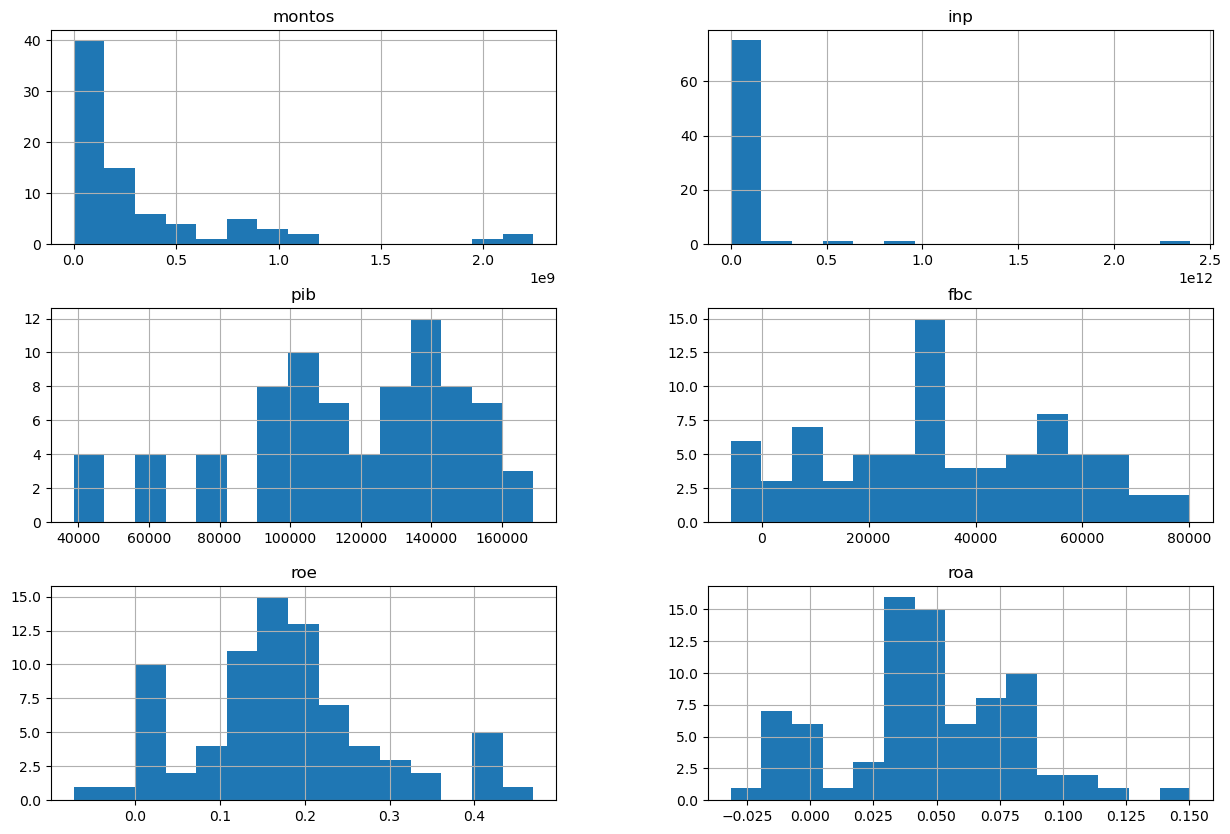

In [15]:
df.hist(bins=15, figsize=(15, 10))
plt.show()

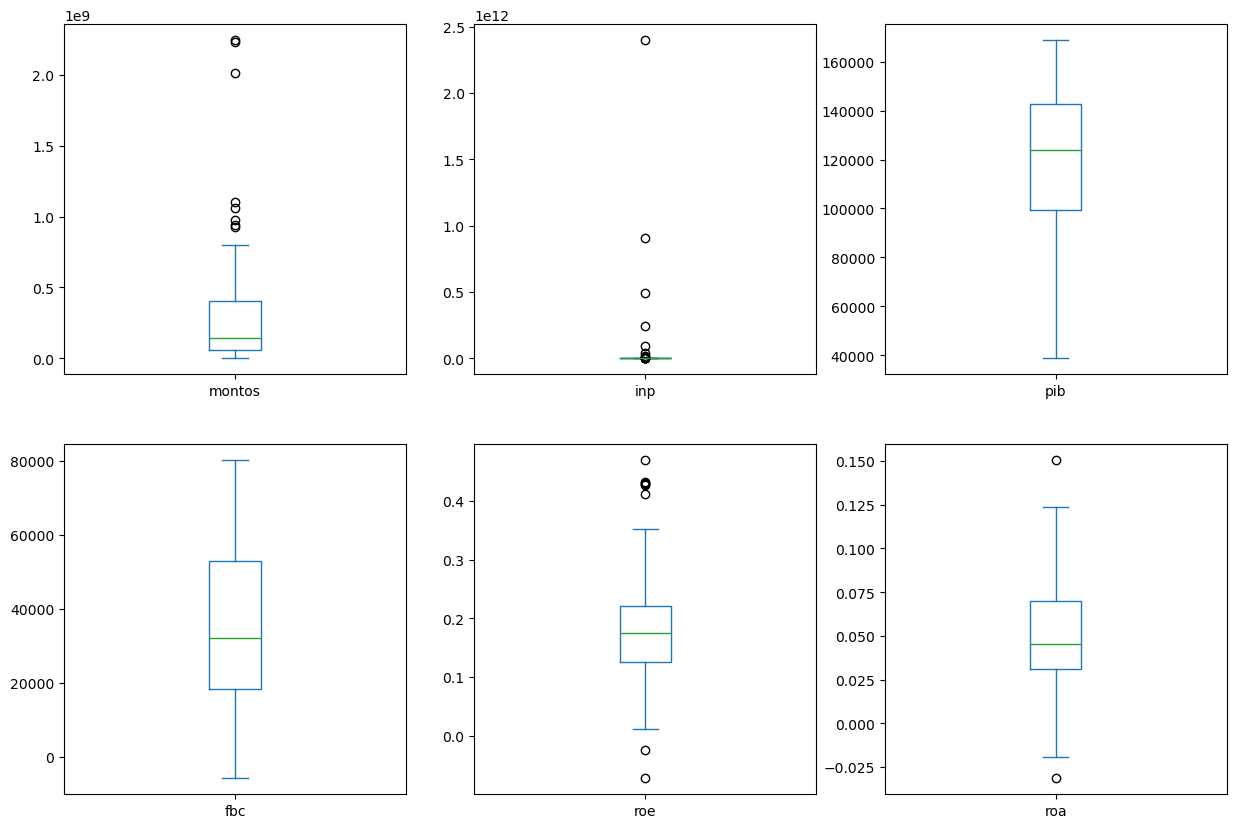

In [16]:
df.plot(kind='box', subplots=True, layout=(2,3), figsize=(15, 10), sharex=False, sharey=False)
plt.show()

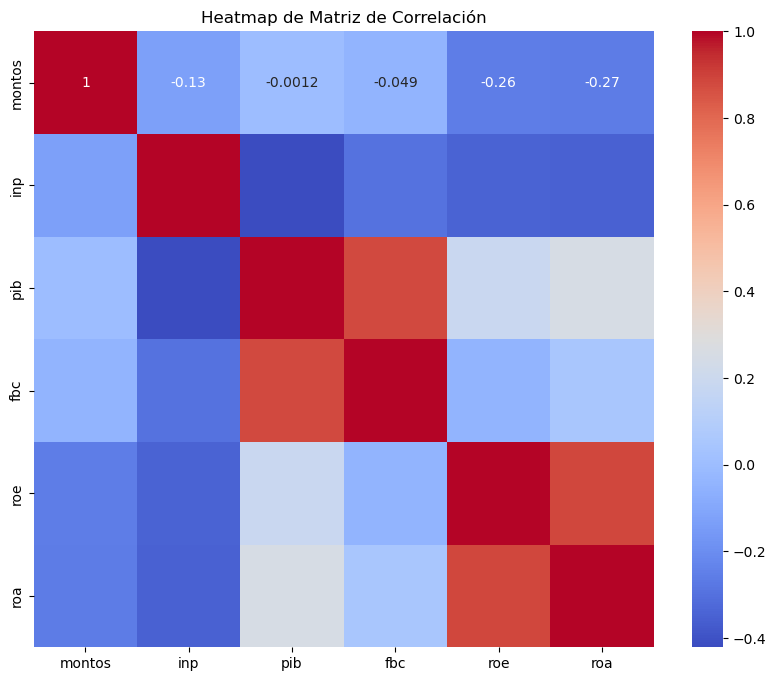

In [17]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap de Matriz de Correlación')
plt.show()

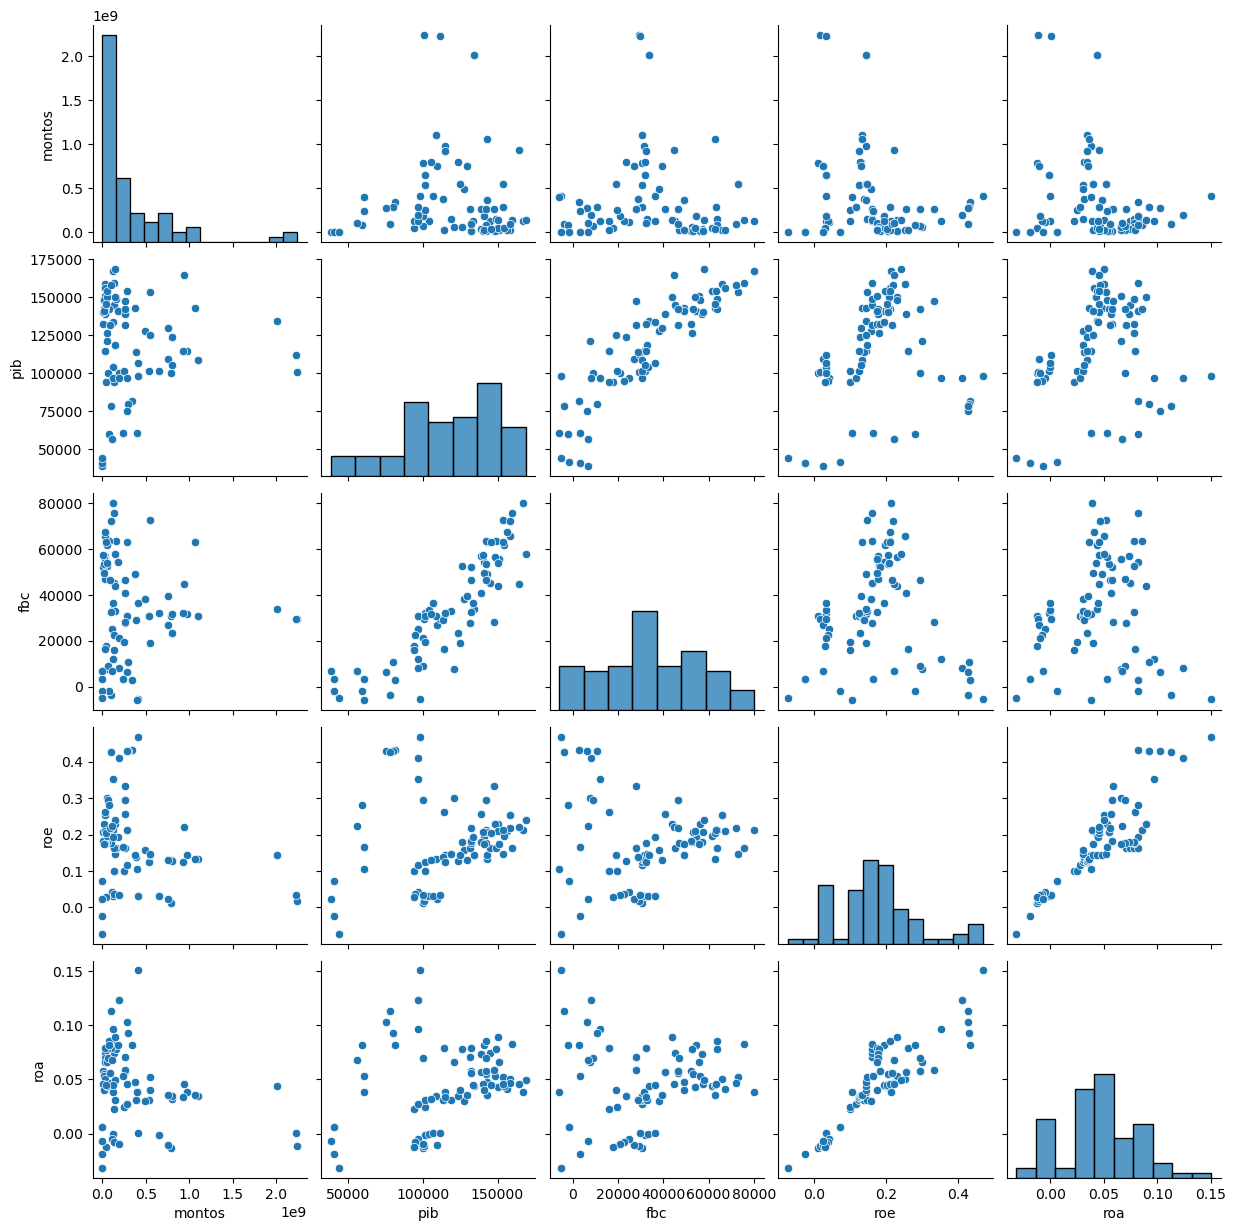

In [18]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
sns.pairplot(df[['montos','pib', 'fbc', 'roe', 'roa']])
plt.show()

<Figure size 1000x500 with 0 Axes>

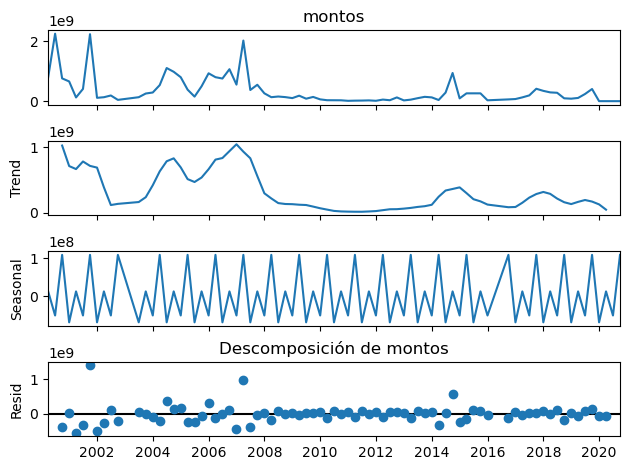

<Figure size 1000x500 with 0 Axes>

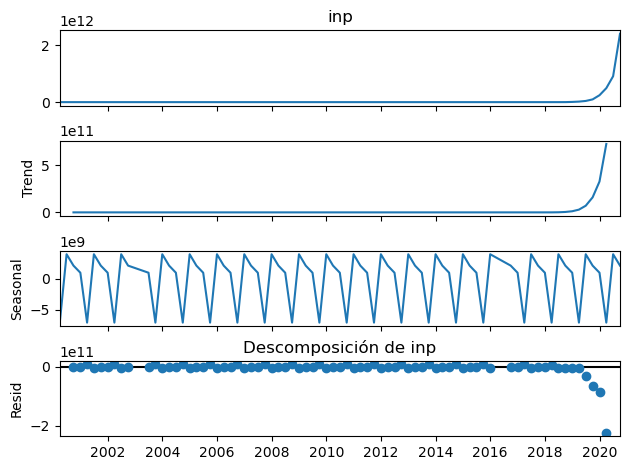

<Figure size 1000x500 with 0 Axes>

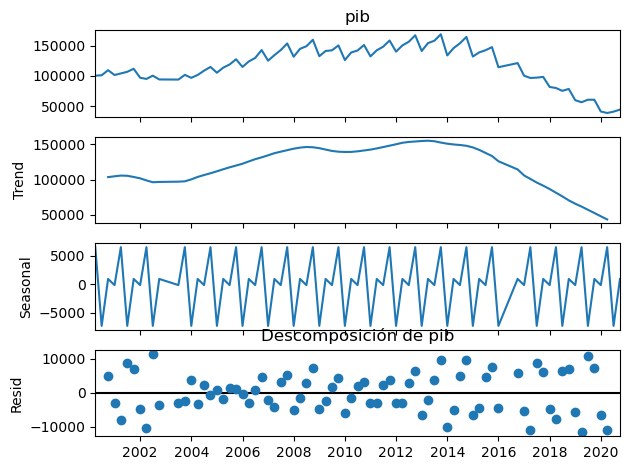

<Figure size 1000x500 with 0 Axes>

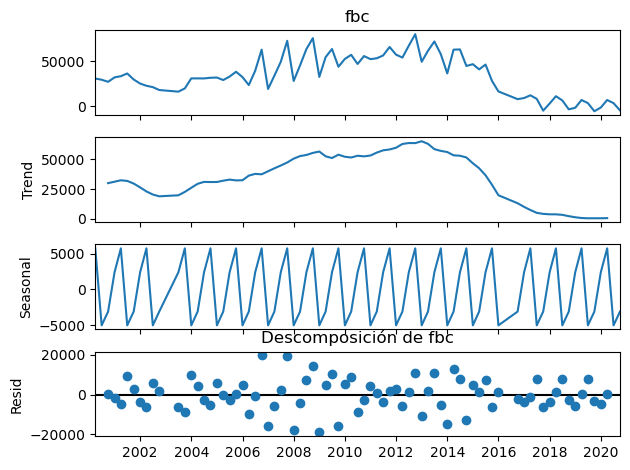

<Figure size 1000x500 with 0 Axes>

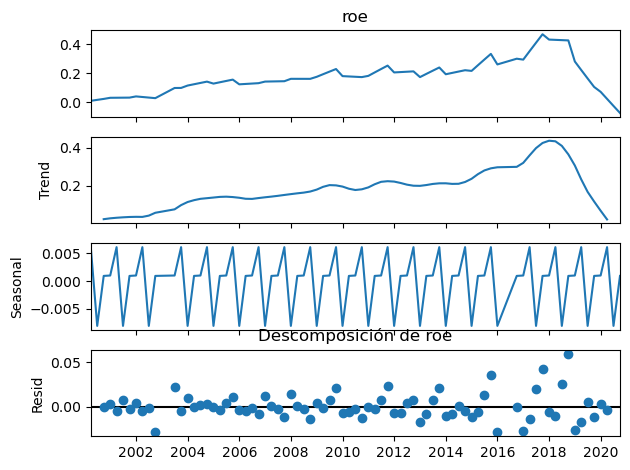

<Figure size 1000x500 with 0 Axes>

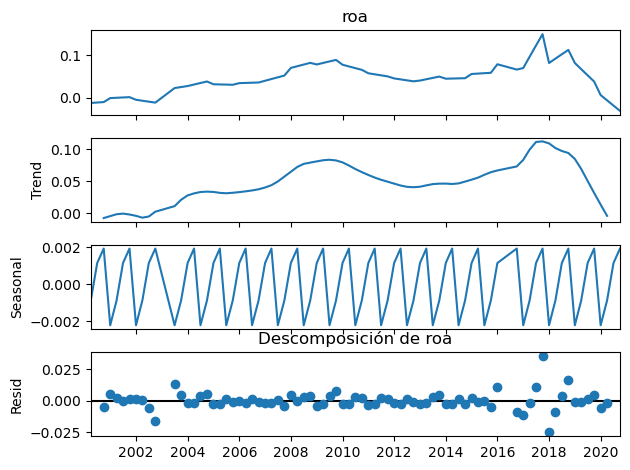

In [19]:

for var in variables:
    # Nos aseguramos de que la serie no tenga valores NaN
    series = df[var].dropna()
    
    # Si la serie tiene una longitud suficiente para descomposición
    if len(series) > 2 * 4:  # '4' es el período para datos trimestrales
        decomposition = sm.tsa.seasonal_decompose(series, model='additive', period=4)
        plt.figure(figsize=(10, 5))
        decomposition.plot()
        plt.title(f'Descomposición de {var}')
        plt.show()

Prueba de Estacionariedad Dickey-Fuller

In [20]:
from statsmodels.tsa.stattools import adfuller

def adfuller_test(series, signif=0.05, name='', verbose=False):
    """ Función de prueba de Dickey-Fuller Aumentada """
    r = adfuller(series, autolag='AIC')
    output = {'test_statistic': round(r[0], 4), 'pvalue': round(r[1], 4), 'n_lags': round(r[2], 4), 'n_obs': r[3]}
    p_value = output['pvalue'] 
    def adjust(val, length= 6): return str(val).ljust(length)

    # Imprimir resultados de la prueba
    if verbose:
        print(f'    Augmented Dickey-Fuller Test on "{name}"', "\n   ", '-'*47)
        print(f' Null Hypothesis: Data has unit root. Non-Stationary.')
        print(f' Significance Level    = {signif}')
        print(f' Test Statistic        = {output["test_statistic"]}')
        print(f' No. Lags Chosen       = {output["n_lags"]}')

        for key, val in r[4].items():
            print(f' Critical value {adjust(key)} = {round(val, 3)}')

        if p_value <= signif:
            print(f" => P-Value = {p_value}. Rejecting Null Hypothesis.")
            print(f" => Series is Stationary.")
        else:
            print(f" => P-Value = {p_value}. Weak evidence to reject the Null Hypothesis.")
            print(f" => Series is Non-Stationary.")

    return p_value <= signif

# Aplicando la prueba de Dickey-Fuller a cada serie
for name, column in df.items():
    adfuller_test(column, name=name, verbose=True)


    Augmented Dickey-Fuller Test on "montos" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -4.9328
 No. Lags Chosen       = 1
 Critical value 1%     = -3.518
 Critical value 5%     = -2.9
 Critical value 10%    = -2.587
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.
    Augmented Dickey-Fuller Test on "inp" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -2.951
 No. Lags Chosen       = 10
 Critical value 1%     = -3.53
 Critical value 5%     = -2.905
 Critical value 10%    = -2.59
 => P-Value = 0.0397. Rejecting Null Hypothesis.
 => Series is Stationary.
    Augmented Dickey-Fuller Test on "pib" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test

Pruebas de cointegración

In [21]:
from statsmodels.tsa.vector_ar.vecm import coint_johansen

# Seleccionar solo las series originales no estacionarias
df_cointegration = df[['pib', 'fbc', 'roe', 'roa']].dropna()

# Realizar la prueba de Johansen
johansen_test = coint_johansen(df_cointegration, det_order=0, k_ar_diff=1)

# Imprimir los resultados de la prueba
print("Valores Eigen: \n", johansen_test.eig)
print("Estadísticas del trazado: \n", johansen_test.lr1)
print("Valores críticos (90%, 95%, 99%): \n", johansen_test.cvt)
print("Estadísticas máximas de Eigen: \n", johansen_test.lr2)
print("Valores críticos para máximas estadísticas de Eigen (90%, 95%, 99%): \n", johansen_test.cvm)


Valores Eigen: 
 [0.47901344 0.14811945 0.10474825 0.03509687]
Estadísticas del trazado: 
 [73.82127661 23.61488708 11.27109687  2.75102274]
Valores críticos (90%, 95%, 99%): 
 [[44.4929 47.8545 54.6815]
 [27.0669 29.7961 35.4628]
 [13.4294 15.4943 19.9349]
 [ 2.7055  3.8415  6.6349]]
Estadísticas máximas de Eigen: 
 [50.20638954 12.34379021  8.52007413  2.75102274]
Valores críticos para máximas estadísticas de Eigen (90%, 95%, 99%): 
 [[25.1236 27.5858 32.7172]
 [18.8928 21.1314 25.865 ]
 [12.2971 14.2639 18.52  ]
 [ 2.7055  3.8415  6.6349]]


Prueba de Estacionariedad a las primeras diferencias

In [22]:
# Realizar la primera diferenciación de las series no estacionarias
df_differenced = df.copy()
df_differenced['pib_diff'] = df['pib'].diff()
df_differenced['fbc_diff'] = df['fbc'].diff()
df_differenced['roe_diff'] = df['roe'].diff()
df_differenced['roa_diff'] = df['roa'].diff()

# Eliminar las filas con valores NaN resultantes de la diferenciación
df_differenced = df_differenced.dropna()

# Realizar las pruebas de Dickey-Fuller nuevamente para las series diferenciadas
for name, column in df_differenced[['pib_diff', 'fbc_diff', 'roe_diff', 'roa_diff']].items():
    print(f'Dickey-Fuller Test: {name}')
    adfuller_test(column, name=name, verbose=True)


Dickey-Fuller Test: pib_diff
    Augmented Dickey-Fuller Test on "pib_diff" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -2.0692
 No. Lags Chosen       = 3
 Critical value 1%     = -3.522
 Critical value 5%     = -2.901
 Critical value 10%    = -2.588
 => P-Value = 0.2571. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.
Dickey-Fuller Test: fbc_diff
    Augmented Dickey-Fuller Test on "fbc_diff" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -2.4503
 No. Lags Chosen       = 5
 Critical value 1%     = -3.525
 Critical value 5%     = -2.903
 Critical value 10%    = -2.589
 => P-Value = 0.128. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.
Dickey-Fuller Test: roe_diff
    Augmented Dickey-Fuller Test on "roe

Prueba de Estacionariedad a las segundas diferencias

In [23]:
# Realizar la segunda diferenciación de las series que siguen siendo no estacionarias
df_second_diff = df_differenced.copy()
df_second_diff['pib_diff2'] = df_differenced['pib_diff'].diff()
df_second_diff['fbc_diff2'] = df_differenced['fbc_diff'].diff()
df_second_diff['roe_diff2'] = df_differenced['roe_diff'].diff()
df_second_diff['roa_diff2'] = df_differenced['roa_diff'].diff()

# Eliminar las filas con valores NaN resultantes de la segunda diferenciación
df_second_diff = df_second_diff.dropna()

# Realizar las pruebas de Dickey-Fuller nuevamente para las series diferenciadas por segunda vez
for name, column in df_second_diff[['pib_diff2', 'fbc_diff2', 'roe_diff2', 'roa_diff2']].items():
    print(f'Dickey-Fuller Test: {name}')
    adfuller_test(column, name=name, verbose=True)


Dickey-Fuller Test: pib_diff2
    Augmented Dickey-Fuller Test on "pib_diff2" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -7.927
 No. Lags Chosen       = 4
 Critical value 1%     = -3.525
 Critical value 5%     = -2.903
 Critical value 10%    = -2.589
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.
Dickey-Fuller Test: fbc_diff2
    Augmented Dickey-Fuller Test on "fbc_diff2" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -8.8642
 No. Lags Chosen       = 4
 Critical value 1%     = -3.525
 Critical value 5%     = -2.903
 Critical value 10%    = -2.589
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.
Dickey-Fuller Test: roe_diff2
    Augmented Dickey-Fuller Test on "roe_diff2" 
    --------------------------------

Creando Data frame para los modelos

In [24]:
# Asumiendo que df es tu DataFrame original
df_differenced = df.diff().dropna()  # Primera diferenciación
df_second_diff = df_differenced.diff().dropna()  # Segunda diferenciación

# Agregamos las segundas diferencias de montos e inp al DataFrame de segundas diferencias
df_second_diff['montos_diff2'] = df_second_diff['montos']
df_second_diff['inp_diff2'] = df_second_diff['inp']
df_second_diff['pib_diff2'] = df_differenced['pib'].diff().dropna()
df_second_diff['fbc_diff2'] = df_differenced['fbc'].diff().dropna()
df_second_diff['roe_diff2'] = df_differenced['roe'].diff().dropna()
df_second_diff['roa_diff2'] = df_differenced['roa'].diff().dropna()

# Seleccionar solo las columnas de interés del DataFrame de segundas diferencias
final_df = df_second_diff[['pib_diff2', 'fbc_diff2', 'roe_diff2', 'roa_diff2', 'montos_diff2', 'inp_diff2']]


Modelos

Analisis de multicolinialidad VIF

In [25]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Asegurarse de que final_df no contenga valores NaN
final_df = final_df.dropna()

# Preparar el DataFrame para el análisis VIF
# Incluyendo todas las variables diferenciadas de segundo orden
vif_data = pd.DataFrame()
vif_data["Variable"] = final_df.columns

# Calcular VIF para cada variable en final_df
vif_data["VIF"] = [variance_inflation_factor(final_df.values, i) for i in range(final_df.shape[1])]

print(vif_data)

       Variable       VIF
0     pib_diff2  2.380635
1     fbc_diff2  1.431477
2     roe_diff2  2.109204
3     roa_diff2  1.222785
4  montos_diff2  1.101657
5     inp_diff2  1.001643


Primer modelo de rezagos distribuido, con segundas difencias. Variable ROE

In [121]:
# Número de rezagos
n_lags = 4

# Crear rezagos para las variables independientes
for lag in range(1, n_lags + 1):
    final_df[[f'pib_diff2_lag{lag}', f'fbc_diff2_lag{lag}', f'montos_diff2_lag{lag}', f'inp_diff2_lag{lag}']] = final_df[['pib_diff2', 'fbc_diff2', 'montos_diff2', 'inp_diff2']].shift(lag)

# Eliminar las filas con valores NaN generados por los rezagos
final_df_lagged = final_df.dropna()

# Definir la variable dependiente y las independientes para ROE
Y_roe = final_df_lagged['roe_diff2']
X_roe = final_df_lagged.drop(['roe_diff2', 'roa_diff2'], axis=1)

# Agregar una constante a las variables independientes
X_roe = sm.add_constant(X_roe)

# Construir y ajustar el modelo
model_roe = sm.OLS(Y_roe, X_roe).fit()
print(model_roe.summary())


                            OLS Regression Results                            
Dep. Variable:              roe_diff2   R-squared:                       0.671
Model:                            OLS   Adj. R-squared:                  0.544
Method:                 Least Squares   F-statistic:                     5.292
Date:                Tue, 30 Jan 2024   Prob (F-statistic):           6.68e-07
Time:                        01:12:36   Log-Likelihood:                 172.18
No. Observations:                  73   AIC:                            -302.4
Df Residuals:                      52   BIC:                            -254.3
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.0004      0.00

Primer modelo de rezagos distribuido, con segundas difencias. Variable ROA

In [122]:
# Definir la variable dependiente y las independientes para ROA
Y_roa = final_df_lagged['roa_diff2']
X_roa = final_df_lagged.drop(['roe_diff2', 'roa_diff2'], axis=1)

# Agregar una constante a las variables independientes
X_roa = sm.add_constant(X_roa)

# Construir y ajustar el modelo
model_roa = sm.OLS(Y_roa, X_roa).fit()
print(model_roa.summary())

                            OLS Regression Results                            
Dep. Variable:              roa_diff2   R-squared:                       0.328
Model:                            OLS   Adj. R-squared:                  0.069
Method:                 Least Squares   F-statistic:                     1.269
Date:                Tue, 30 Jan 2024   Prob (F-statistic):              0.242
Time:                        01:12:36   Log-Likelihood:                 203.72
No. Observations:                  73   AIC:                            -365.4
Df Residuals:                      52   BIC:                            -317.3
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.0004      0.00

Probando Multicolinialidad para los rezagos

In [123]:
correlation_matrix = X_roe.corr()
print("Matriz de Correlación:")
print(correlation_matrix)

Matriz de Correlación:
                   const  pib_diff2  fbc_diff2  montos_diff2  inp_diff2  \
const                NaN        NaN        NaN           NaN        NaN   
pib_diff2            NaN   1.000000   0.445293      0.309906   0.010121   
fbc_diff2            NaN   0.445293   1.000000      0.115552  -0.024881   
montos_diff2         NaN   0.309906   0.115552      1.000000  -0.000291   
inp_diff2            NaN   0.010121  -0.024881     -0.000291   1.000000   
pib_diff2_lag1       NaN  -0.639042  -0.330871     -0.214880   0.030106   
fbc_diff2_lag1       NaN  -0.130746  -0.469992     -0.154124  -0.053483   
montos_diff2_lag1    NaN  -0.252243  -0.191400     -0.653802   0.000860   
inp_diff2_lag1       NaN   0.044027  -0.028244      0.015201   0.873630   
pib_diff2_lag2       NaN   0.259874   0.011780      0.169769   0.078733   
fbc_diff2_lag2       NaN   0.000884  -0.215770      0.243020   0.025235   
montos_diff2_lag2    NaN   0.121845   0.228061      0.144310   0.047142   
in

In [124]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["Variable"] = X_roe.columns
vif["VIF"] = [variance_inflation_factor(X_roe.values, i) for i in range(X_roe.shape[1])]
print("Factor de Inflación de la Varianza (VIF):")
print(vif)


Factor de Inflación de la Varianza (VIF):
             Variable         VIF
0               const    1.078366
1           pib_diff2   14.657312
2           fbc_diff2    7.632466
3        montos_diff2    4.706641
4           inp_diff2  962.072336
5      pib_diff2_lag1   33.035240
6      fbc_diff2_lag1   23.019090
7   montos_diff2_lag1    8.578589
8      inp_diff2_lag1   20.181629
9      pib_diff2_lag2   39.617241
10     fbc_diff2_lag2   34.294486
11  montos_diff2_lag2   10.366431
12     inp_diff2_lag2  245.604391
13     pib_diff2_lag3   36.595255
14     fbc_diff2_lag3   23.914914
15  montos_diff2_lag3    8.496897
16     inp_diff2_lag3  889.116067
17     pib_diff2_lag4   14.197854
18     fbc_diff2_lag4    7.875098
19  montos_diff2_lag4    4.689081
20     inp_diff2_lag4  274.512257


Mejorando el modelo (se quita multicolinialidad) y se eliminan las variables no significativas

In [125]:
import statsmodels.api as sm

# Eliminación de 'inp_diff2' y sus rezagos
variables_a_eliminar = ['inp_diff2', 'inp_diff2_lag1', 'inp_diff2_lag2', 'inp_diff2_lag3', 'inp_diff2_lag4']
final_df_lagged = final_df_lagged.drop(columns=variables_a_eliminar)

# Inicializar variables para el proceso de eliminación hacia atrás
variables_significativas = final_df_lagged.columns.drop(['roe_diff2', 'roa_diff2'])
p_value_maximo = 1
umbral_significancia = 0.05  # Puedes ajustar este umbral según tus necesidades

# Proceso de eliminación hacia atrás
while p_value_maximo > umbral_significancia:
    # Ajustar el modelo
    X_roe = sm.add_constant(final_df_lagged[variables_significativas])
    Y_roe = final_df_lagged['roe_diff2']
    modelo = sm.OLS(Y_roe, X_roe).fit()

    # Obtener el p-value máximo
    p_value_maximo = max(modelo.pvalues)
    variable_con_p_value_maximo = modelo.pvalues.idxmax()

    # Eliminar la variable menos significativa (excluyendo 'const')
    if p_value_maximo > umbral_significancia and variable_con_p_value_maximo != 'const':
        variables_significativas = variables_significativas.drop(variable_con_p_value_maximo)
    else:
        break  # Salir del bucle si no se puede eliminar más variables

# Ajustar y mostrar el modelo final
modelo_final = sm.OLS(Y_roe, sm.add_constant(final_df_lagged[variables_significativas])).fit()
print(modelo_final.summary())


                            OLS Regression Results                            
Dep. Variable:              roe_diff2   R-squared:                       0.597
Model:                            OLS   Adj. R-squared:                  0.517
Method:                 Least Squares   F-statistic:                     7.413
Date:                Tue, 30 Jan 2024   Prob (F-statistic):           3.92e-08
Time:                        01:12:36   Log-Likelihood:                 164.84
No. Observations:                  73   AIC:                            -303.7
Df Residuals:                      60   BIC:                            -273.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.0012      0.00